# Experimentation Request for Comment (RFC): Are Infants Whose Low-Income  Mothers Exclusively Breastfeed Them Healthier Than Those Whose Low-Income Mothers Don't Breastfeed Them At All?


**Dataset Primary Source:** [USDA Food & Nutrition Service](https://www.fns.usda.gov/pd/wic-program)  
**Dataset Secondary Source:** [Kaggle](https://www.kaggle.com/jpmiller/publicassistance/data)

## Background

On December 2, 2010, the Department of Health & Human Service (DHHS) released Healthy People 2020, a 10-year national health improvement roadmap developed by the Centers for Disease Control & Prevention (CDC). Four of its objectives regarding maternal, infant, & child health, and five sub-objectives aligned to them focus on [breastfeeding](https://www.cdc.gov/breastfeeding/policy/hp2020.htm). 

Historically, mothers who are younger than 20, hold a high school diploma or less, are African American, live in rural areas, or are considered low-income according to the poverty threshold are least likely to exclusively breastfeed their infants through the first 3 months at a minimum. **I inferred that the mothers of the infants in this dataset qualify as 'low-income' based on their participation in the Special Supplemental Nutrition Program for Women, Infants, and Children (WIC) program. **

Considering breastfeeding's [established relationship to infants' health outcomes](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3508512/), this would imply that Healthy People 2020 should prioritize initiatives that increase rates among population segments that are historically least likely to do so based on their demographic profile (age, education level, race, and socioeconomic status). 

Breastfeeding nourishes infants, confers immunoprotection, and regulates growth/development/metabolism via antibodies (such as sIgA, IgM, and IgG), hormones, neuropeptides, and growth factors. Infants who are not breastfed, or who are breastfed for short periods and/or at low intensity, are at higher risk for diseases than those who are breastfed optimally. The study cited above presents data on Acute Lymphoblastic Leukemia, Gastrointestinal Infections, Obesity, and Upper/Lower Respiratory Infections.

Researchers have also studied the health care costs of formula-feeding in the first year of life and found that, compared to infants exclusively breastfed for 3 months, infants never breastfed made 2,033 more illness-related visits, spent 212 more days in the hospital, and needed 609 more prescriptions in the first year (n=1,000 for both cohorts). 

## Experimental Design

**Hypothesis:** Infants whose low-income mothers exclusively breastfeed them are healthier than those whose low-income mothers don't breastfeed them at all.

**Sample:** Randomly selected from the total population of infants born in the United States to low-income mothers who are beneficiaries of the Children's Health Insurance Plan (CHIP), Medicaid, and/or the Special Supplemental Nutrition Program for Women, Infants, and Children (WIC). The infants are aliases for their mothers, who consent to anonymous data collection and adherence to participation guidelines in exchange for a nominal financial incentive. Mothers' pre-existing breastfeeding preferences (to exclusively do so or to not do so at all) would dictate their cohort placement but otherwise shouldn't be influenced. 

**Treatment:** Equipartitioning the sample into two cohorts - infants who are exclusively breastfed throughout the experiment and those who aren't breastfed at all. 

## Rollout & Evaluation Plan 


**Impact Window:** The first year post-partum.  

**Data Collection Approach:** Mothers would report either to an assigned site - a nearby public healthcare facility or a preferred alternate (a nearby private non-profit clinic for example) - for all of their infants' healthcare needs throughout the experiment (incidental or routine). These sites must already have electronic health record (EHR) systems implemented, to streamline data collection.  

**Primary Metrics:** Infants' monthly (physical, cognitive, emotional/social, language, and sensory/motor)development assessment scores in both cohorts. 

**Secondary Metrics:** Frequency and severity score of hospitalizations and illness-related visits for infants in both cohorts.  

## Analysis 

In [532]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
The code for this notebook is hidden for easier reading.
To toggle it on/off, please click <a href="javascript:code_toggle()">here</a>.''')

In [533]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

i_fullybreastfeeding = pd.read_csv('C:\\Users\\beri.e.ndifon\\Documents\\Everything Else\\Personal\\Thinkful\\CSV Datasets\\Unit 1 Capstone Project\\Infants_Exclusively_Breastfeeding.csv')
i_fullybreastfeeding['Who'] = 'Infants'
i_fullybreastfeeding['How'] = 'Exclusively Breastfeeding'

i_notbreastfeeding = pd.read_csv('C:\\Users\\beri.e.ndifon\\Documents\\Everything Else\\Personal\\Thinkful\\CSV Datasets\\Unit 1 Capstone Project\\Infants_Not_Breastfeeding.csv')
i_notbreastfeeding['Who'] = 'Infants'
i_notbreastfeeding['How'] = 'Not Breastfeeding'

sample = [i_fullybreastfeeding, i_notbreastfeeding]
composite = pd.concat(sample)
composite.dropna(inplace=True)
composite.notnull()
keys = {'State Agency or Indian Tribal Organization':'Where','Average Participation':'Average','2015-10-01 00:00:00':'October 2015','2015-11-01 00:00:00':'November 2015','2015-12-01 00:00:00':'December 2015','2016-01-01 00:00:00':'January 2016','2016-02-01 00:00:00':'February 2016','2016-03-01 00:00:00':'March 2016','2016-04-01 00:00:00':'April 2016','2016-05-01 00:00:00':'May 2016','2016-06-01 00:00:00':'June 2016','2016-07-01 00:00:00':'July 2016','2016-08-01 00:00:00':'August 2016','2016-09-01 00:00:00':'September 2016'}
composite.rename(columns=keys, inplace=True)
composite.sort_values(by='Where',inplace=True)

In [534]:
i_summedacrosswhere = composite.groupby('How').sum()
i_summedacrosswhere.sort_values(by='Average',inplace=True)

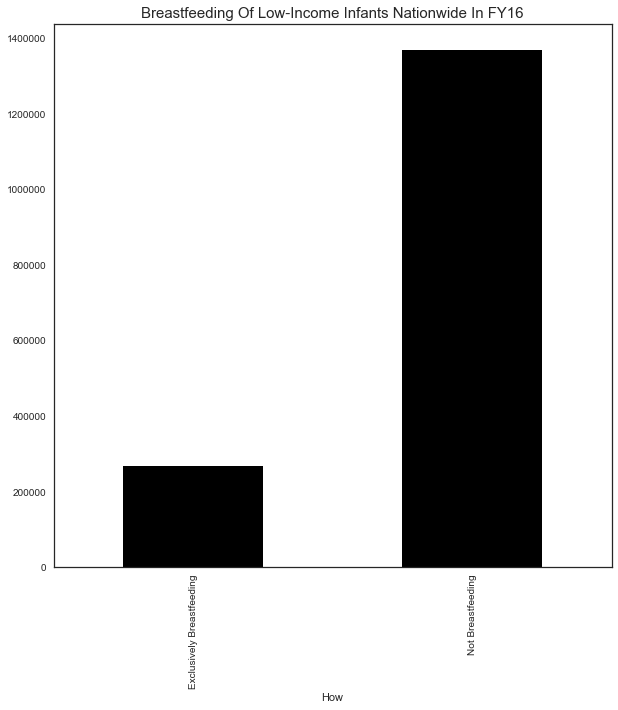

In [549]:
sns.set_style("white")
plt.figure(figsize=[10,10])
plot1 = i_summedacrosswhere['Average'].plot(kind='bar',color='black')
plot1 = sns.plt.title('Breastfeeding Of Low-Income Infants Nationwide In FY16',fontsize=15)

In [536]:
infants = composite.sort_values(by='Average', ascending=True)

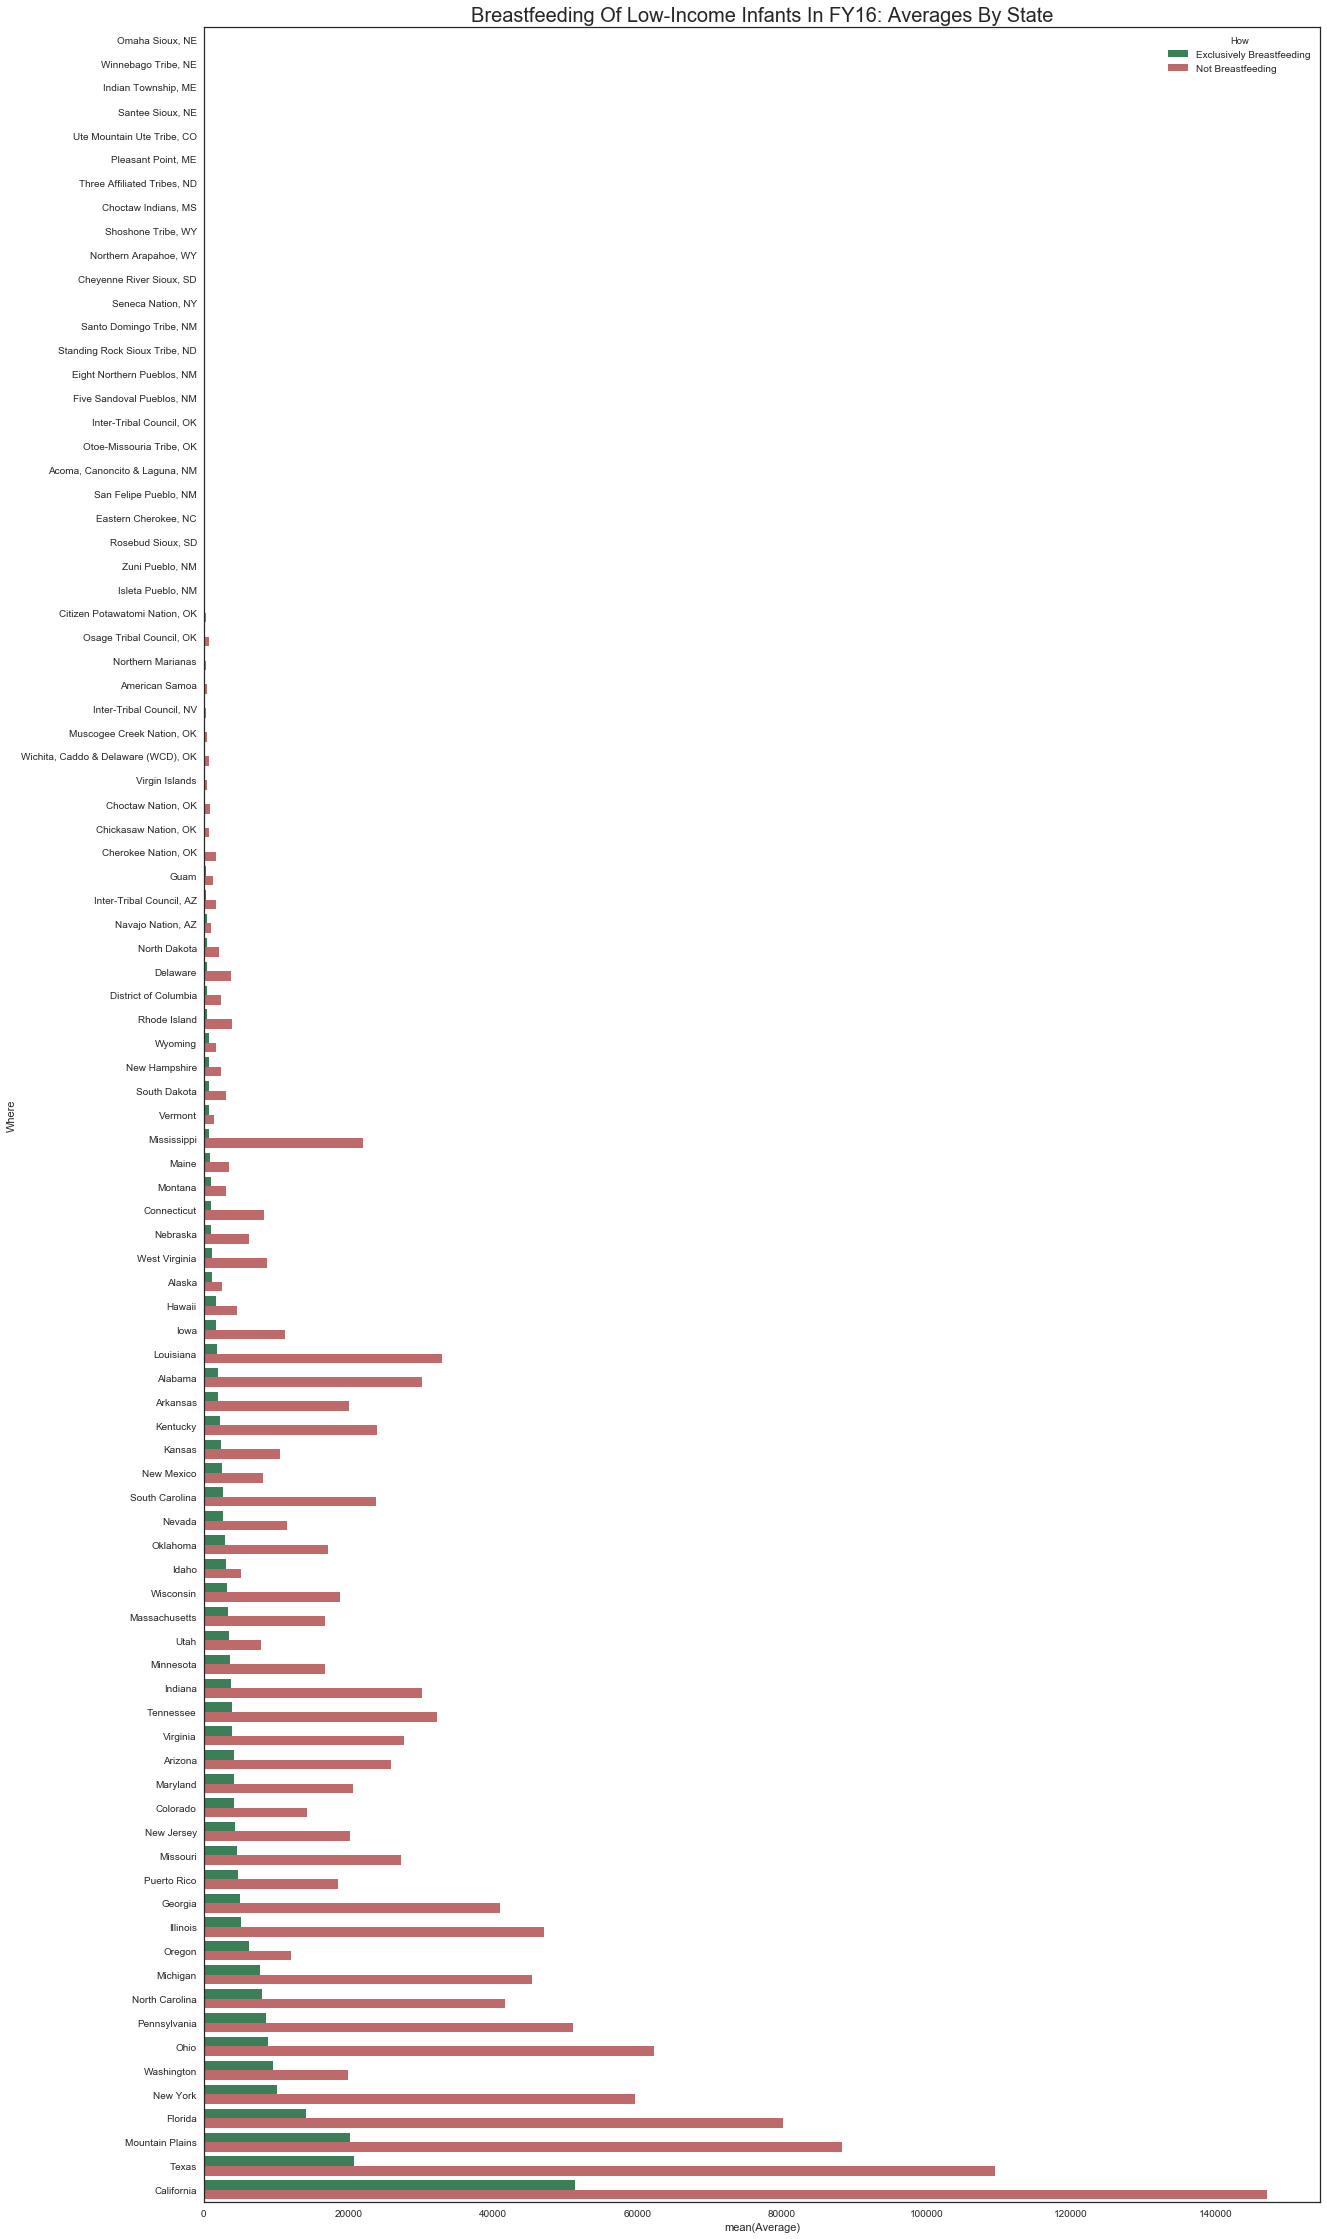

In [537]:
sns.set(rc={'figure.figsize':(20,40)})
sns.set_style("white")

plot3 = sns.barplot(y=infants.Where, x=infants.Average, hue=infants.How, data=infants, hue_order=['Exclusively Breastfeeding','Not Breastfeeding'],palette=sns.color_palette(palette=['seagreen','indianred']))
plot3 = sns.plt.title('Breastfeeding Of Low-Income Infants In FY16: Averages By State', fontsize=20)

### FY16 Breastfeeding of Low-Income Infants In FY16 By State: Count Density By State

In [538]:
switchup = pd.melt(composite, id_vars = ['Who','How','Where'], var_name = 'Month & Year')
switchup.rename(columns={'value':'Count'}, inplace=True)

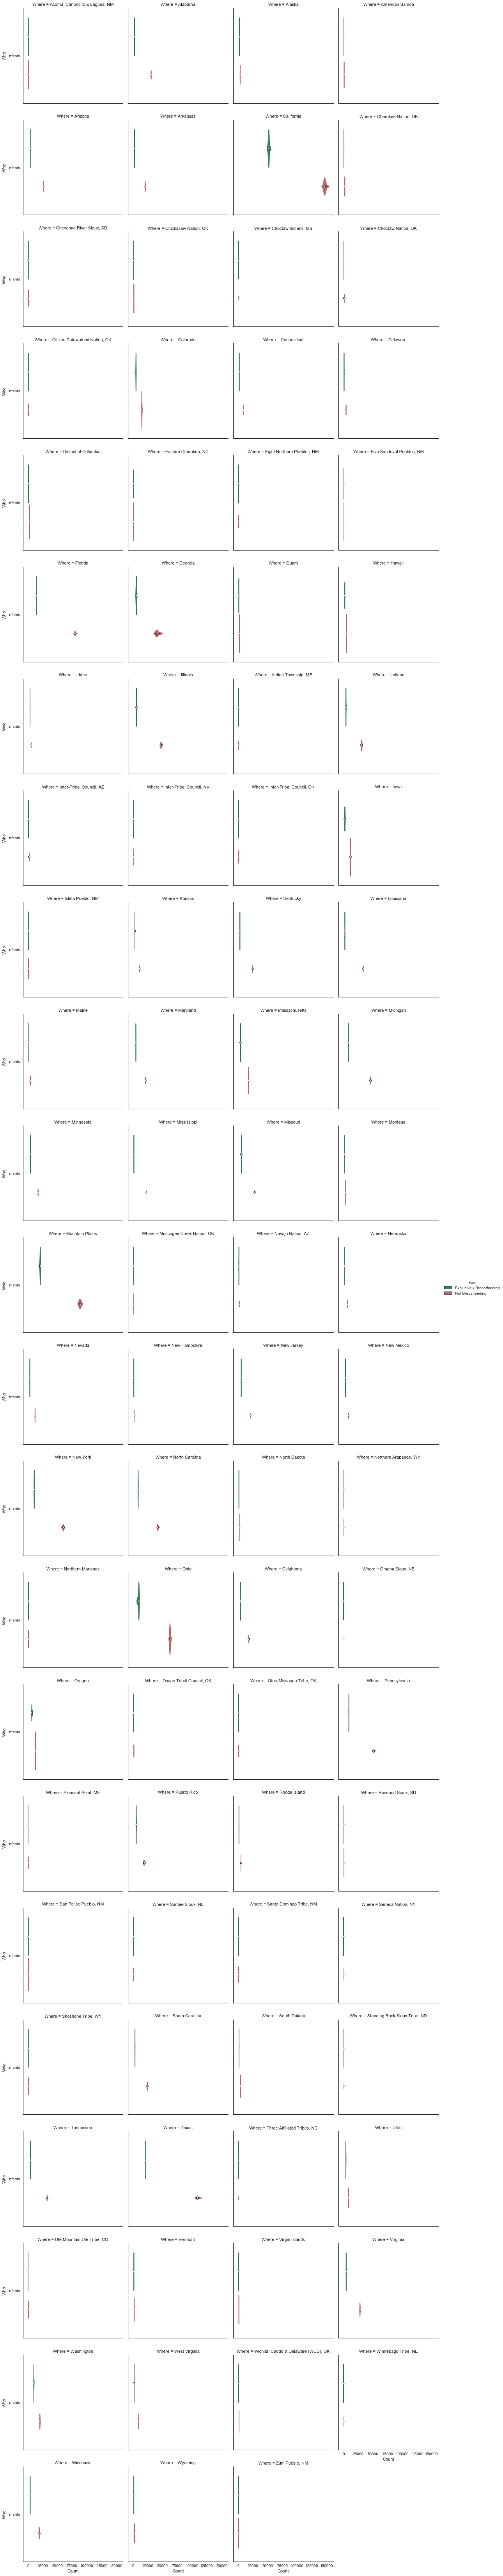

In [539]:
sns.set(rc={'figure.figsize':(10,20)},style="white")
plot5 = sns.factorplot(y='Who', x='Count', col='Where', hue='How', hue_order=['Exclusively Breastfeeding','Not Breastfeeding'], data=switchup, col_wrap=4, kind='violin',palette=sns.color_palette(palette=['seagreen','indianred']))

### Evidence Supporting Breastfeeding's Beneficial Impact On Infant Health

In [540]:
outcomes = pd.read_csv('C:\\Users\\beri.e.ndifon\\Documents\\Everything Else\\Personal\\Thinkful\\CSV Datasets\\Unit 1 Capstone Project\\Infants_Health_Outcomes.csv')

In [541]:
ALL = outcomes.iloc[0:2]
CD = outcomes.iloc[2:4]
GTI = outcomes.iloc[4:10]
O = outcomes.iloc[12:22]
HRTI = outcomes.iloc[10:12]
ULRTI = outcomes.iloc[26:34]
RTI = pd.concat([HRTI,ULRTI])
SIDS = outcomes.iloc[34:]

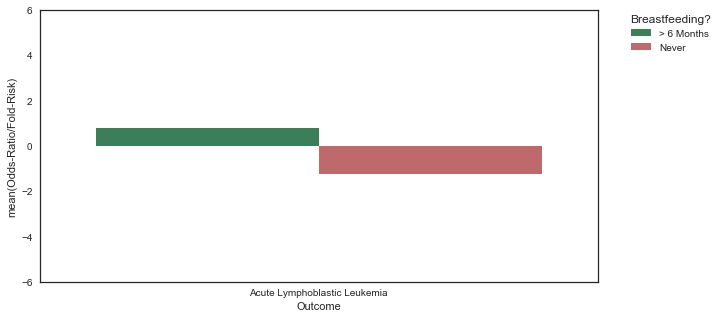

In [542]:
colors = ['indianred' if (y < 0) else 'seagreen' for y in ALL['Odds-Ratio/Fold-Risk']]
sns.set_style("white")
plt.figure(figsize=[10,5])
plot = sns.barplot(x=ALL['Outcome'],y=ALL['Odds-Ratio/Fold-Risk'],data=ALL, hue=ALL['Breastfeeding?'],palette=colors)
plt.legend(title='Breastfeeding?', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
yticks = plt.ylim([-6,6])

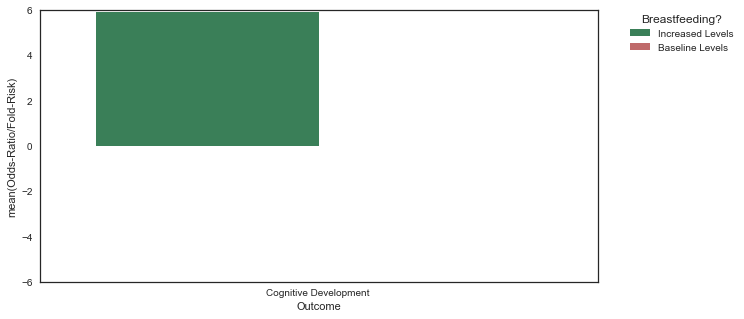

In [543]:
colors = ['indianred' if (y < 0) else 'seagreen' for y in outcomes['Odds-Ratio/Fold-Risk']]

sns.set_style("white")
plt.figure(figsize=[10,5])
plot = sns.barplot(x=CD['Outcome'],y=CD['Odds-Ratio/Fold-Risk'],data=CD, hue=CD['Breastfeeding?'],palette=colors)
plt.legend(title='Breastfeeding?', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
yticks = plt.ylim([-6,6])

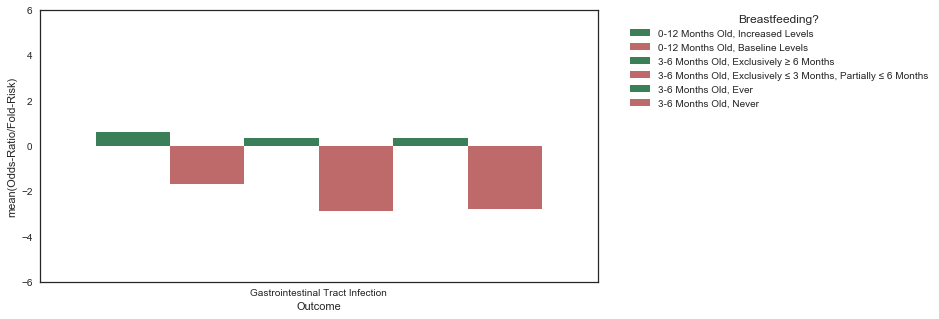

In [544]:
sns.set_style("white")
plt.figure(figsize=[10,5])
colors = ['indianred' if (y < 0) else 'seagreen' for y in GTI['Odds-Ratio/Fold-Risk']]
plot = sns.barplot(x=GTI['Outcome'],y=GTI['Odds-Ratio/Fold-Risk'],data=GTI, hue=GTI['Breastfeeding?'],palette=colors)
plt.legend(title='Breastfeeding?', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
yticks = plt.ylim([-6,6])

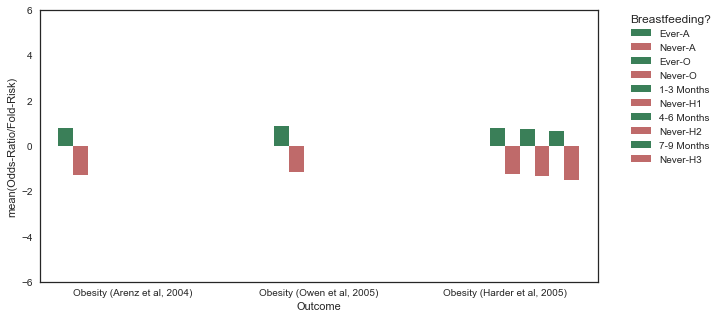

In [545]:
sns.set_style("white")
plt.figure(figsize=[10,5])
plot = sns.barplot(x=O['Outcome'],y=O['Odds-Ratio/Fold-Risk'],data=O, hue=O['Breastfeeding?'], palette=colors)
plt.legend(title='Breastfeeding?', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
yticks = plt.ylim([-6,6])

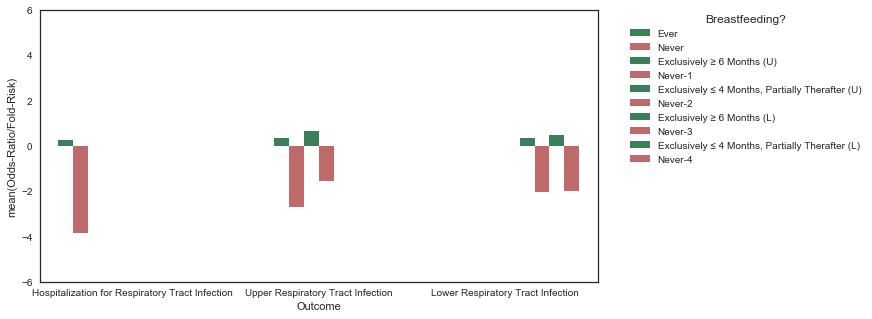

In [546]:
sns.set_style("white")
plt.figure(figsize=[10,5])
plot = sns.barplot(x=RTI['Outcome'],y=RTI['Odds-Ratio/Fold-Risk'],data=RTI, hue=RTI['Breastfeeding?'], palette=colors)
plt.legend(title='Breastfeeding?', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
yticks = plt.ylim([-6,6])

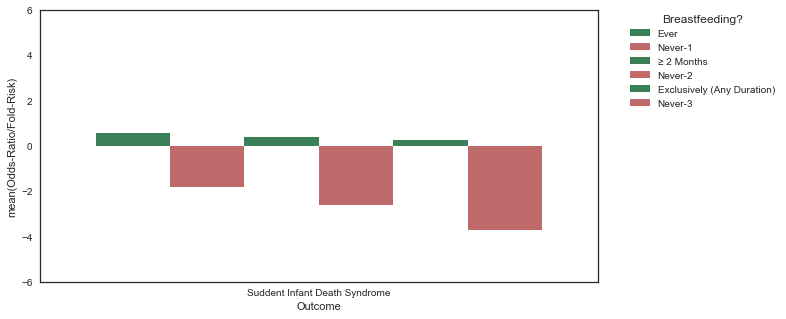

In [547]:
sns.set_style("white")
plt.figure(figsize=[10,5])
colors = ['indianred' if (y < 0) else 'seagreen' for y in ULRTI['Odds-Ratio/Fold-Risk']]
plot = sns.barplot(x=SIDS['Outcome'],y=SIDS['Odds-Ratio/Fold-Risk'],data=SIDS, hue=SIDS['Breastfeeding?'],palette=colors)
plt.legend(title='Breastfeeding?', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
yticks = plt.ylim([-6,6])